In [1]:
%matplotlib inline  
import pdb
import random
import pylab as pl
from scipy.optimize import fmin_bfgs
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [17]:
def designMatrix(X, order):
    N = len(X)
    phi = np.array([[0.]*order]*N)
    for i in range(N):
        for j in range(order):
            phi[i,j] = X[i]**j
    return phi

In [18]:
def regressionFit(X, Y, phi):
    phiT = np.transpose(phi)
    a = np.dot(phiT,Y)
    phiInv = inv(np.dot(phiT,phi))
    w = np.dot(phiInv,a)
    return w

In [43]:
# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values
# order is the order of the highest order polynomial in the basis functions
def regressionPlot(X, Y, order):
    # constuct the design matrix (Bishop 3.16), the 0th column is just 1s.
    phi = designMatrix(X, order+1)
    # print phi
    # compute the weight vector
    w = regressionFit(X, Y, phi)
    print 'w', w
    # produce a plot of the values of the function 
    pts = np.linspace(min(X), max(X), 100)
    Yp = np.dot(designMatrix(pts, order+1), w)
    pl.plot(pts, Yp)

w [  0.31370273   7.98537103 -25.42610224  17.37407653]


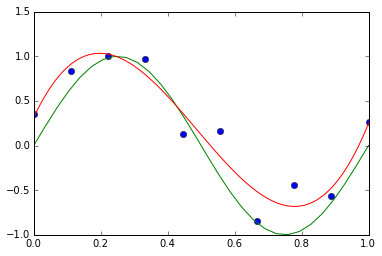

In [96]:
X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]

plt.plot(X,Y, marker = "o", linestyle = "None")
plt.plot(np.linspace(0,1,30), np.sin(2*np.pi*np.linspace(0,1,30)))
regressionPlot(X,Y,3)
plt.show()


In [55]:
def polyPredict(X, M, w):
    N = len(X)
    Ypred = np.array([0.]*N)
    for i in range(N):
        for j in range(M+1):
            Ypred[i] += w[j]*X[i]**j
    return Ypred

In [56]:
def sse(X, Y, M, w):
    Ypred = polyPredict(X, M, w)
    sse = 0
    for i in range(len(Ypred)):
        sse += (Ypred[i] - Y[i])**2
    return sse

In [66]:
def sseGrad(X, Y, M, w):
    ret = np.array([0.]*(M+1))
    Ypred = polyPredict(X, M, w)
    for j in range(M+1):
        ret[j]= 0
        for i in range(len(Y)):
            ret[j] -= 2*X[i]**j * (Y[i] - Ypred[i])
    return(ret)

In [71]:
def derivative(f, x, var, epsilon):
    y = np.copy(x)
    y[var] += epsilon
    return ((f(y) - f(x))/epsilon)
def gradient(f,x,epsilon):
    grad = np.array([0.]*len(x))
    for i in range(len(x)):
        grad[i] = derivative(f, x, i, epsilon)
    return grad

In [76]:
M=3
w = [2.]*(M+1)
X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
sseG = sseGrad(X, Y, M, w)
sseG

array([ 81.45920259,  55.25277795,  43.88730298,  37.02178145])

In [78]:
def f(w):
    M=3
    X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
    Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
    return sse(X, Y, M, w)
def gradf(w):
    M=3
    X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
    Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
    return sseGrad(X, Y, M, w)

In [77]:
w = [2.]*(M+1)
numSseGrad = gradient(f, w, 0.01)
numSseGrad

array([ 81.55920259,  55.28796314,  43.9106729 ,  37.04019187])

In [86]:
def gradientDescent(f, gradf, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)
    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x1,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradf(x1)
        x0 = np.copy(x1)
        x1 = np.copy(x0) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
    return(hist)

In [135]:
M = 3
#w = [0., 8., -25., 17]
w = [1., 1., 1., 1]
hist = gradientDescent(f, gradf, w, 0.06, 10**(-7), 30000)
print len(hist)
for x in hist[0:-1:500]:
    print [round(i,4) for i in x]
hist[-1, 0:4] - [ 0.31370273,  7.98537103, -25.42610224, 17.37407653]

22882
[1.0, 1.0, 1.0, 1.0, 57.9087]
[0.9278, -1.1212, -2.4861, 2.4981, 1.6676]
[0.8732, -0.2994, -4.5683, 3.8529, 1.4391]
[0.8224, 0.4528, -6.4621, 5.0806, 1.2503]
[0.7762, 1.1367, -8.1839, 6.1967, 1.0941]
[0.7342, 1.7585, -9.7494, 7.2116, 0.9651]
[0.696, 2.3239, -11.1728, 8.1343, 0.8584]
[0.6613, 2.8379, -12.4669, 8.9732, 0.7702]
[0.6298, 3.3053, -13.6435, 9.736, 0.6973]
[0.6011, 3.7302, -14.7133, 10.4295, 0.637]
[0.575, 4.1166, -15.686, 11.06, 0.5872]
[0.5513, 4.4678, -16.5703, 11.6333, 0.546]
[0.5297, 4.7872, -17.3744, 12.1545, 0.512]
[0.5101, 5.0776, -18.1054, 12.6284, 0.4839]
[0.4922, 5.3416, -18.7701, 13.0593, 0.4606]
[0.476, 5.5816, -19.3744, 13.4511, 0.4414]
[0.4613, 5.7999, -19.9239, 13.8072, 0.4255]
[0.4479, 5.9983, -20.4235, 14.1311, 0.4123]
[0.4357, 6.1787, -20.8777, 14.4255, 0.4015]
[0.4246, 6.3428, -21.2906, 14.6933, 0.3925]
[0.4146, 6.4919, -21.6661, 14.9367, 0.3851]
[0.4054, 6.6275, -22.0075, 15.158, 0.3789]
[0.3971, 6.7508, -22.3179, 15.3592, 0.3738]
[0.3895, 6.8629, -

array([ 0.00868495, -0.12860235,  0.32376999, -0.20988528])

In [ ]:
def bishopCurveData():
    # y = sin(2 pi x) + N(0,0.3),
    return getData('curvefitting.txt')

def regressTrainData():
    return getData('regress_train.txt')

def regressValidateData():
    return getData('regress_validate.txt')